In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("productivity_raw.csv")

In [6]:
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDPHRWKD,TOT,USD,A,1970,26.841344,NaN
1,AUS,GDPHRWKD,TOT,USD,A,1971,27.511634,NaN
2,AUS,GDPHRWKD,TOT,USD,A,1972,28.118660,NaN
3,AUS,GDPHRWKD,TOT,USD,A,1973,28.698975,NaN
4,AUS,GDPHRWKD,TOT,USD,A,1974,28.238353,NaN
...,...,...,...,...,...,...,...,...
3940,COL,GDPHRWKD,TOT,IDX2015,A,2018,104.505878,NaN
3941,COL,GDPHRWKD,TOT,IDX2015,A,2019,107.793852,NaN
3942,COL,GDPHRWKD,TOT,IDX2015,A,2020,128.766334,NaN
3943,COL,GDPHRWKD,TOT,IDX2015,A,2021,114.888693,NaN


In [5]:
df["LOCATION"].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'OECD',
       'EU28', 'G-7', 'LVA', 'LTU', 'EA19', 'ZAF', 'CRI', 'BGR', 'HRV',
       'ROU', 'EU27_2020', 'COL'], dtype=object)

In [13]:
(df["LOCATION"].isin(["EU28", "G-7", "EU27-2020", "OECD"])).sum()

202

In [22]:
df_filtered = df.loc[~df["LOCATION"].isin(["EU28", "G-7", "EU27_2020", "OECD", "EA19"])]

In [23]:
df_filtered["LOCATION"].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'LVA',
       'LTU', 'ZAF', 'CRI', 'BGR', 'HRV', 'ROU', 'COL'], dtype=object)

In [24]:
country_names = ['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea, Republic of (South Korea)', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia', 'Israel', 'Russia', 'Slovenia','Latvia','Lithuania','South Africa','Costa Rica','Bulgaria','Croatia','Romania','Colombia']

In [25]:
country_codes = list(df_filtered["LOCATION"].unique())

In [27]:
code_to_name = {key:value for key, value in zip(country_codes, country_names)}

In [30]:
df_filtered["LOCATION"] = df_filtered["LOCATION"].replace(code_to_name)

C:\Users\super\AppData\Local\Temp\ipykernel_18292\761814279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["LOCATION"] = df_filtered["LOCATION"].replace(code_to_name)


In [31]:
df_filtered

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Australia,GDPHRWKD,TOT,USD,A,1970,26.841344,NaN
1,Australia,GDPHRWKD,TOT,USD,A,1971,27.511634,NaN
2,Australia,GDPHRWKD,TOT,USD,A,1972,28.118660,NaN
3,Australia,GDPHRWKD,TOT,USD,A,1973,28.698975,NaN
4,Australia,GDPHRWKD,TOT,USD,A,1974,28.238353,NaN
...,...,...,...,...,...,...,...,...
3940,Colombia,GDPHRWKD,TOT,IDX2015,A,2018,104.505878,NaN
3941,Colombia,GDPHRWKD,TOT,IDX2015,A,2019,107.793852,NaN
3942,Colombia,GDPHRWKD,TOT,IDX2015,A,2020,128.766334,NaN
3943,Colombia,GDPHRWKD,TOT,IDX2015,A,2021,114.888693,NaN


In [37]:
df_filtered = df_filtered[df_filtered["MEASURE"] == "USD"]

In [39]:
df_oup = df_filtered.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1)

In [42]:
(df_oup.groupby(["LOCATION", "TIME"]).agg("count") == 1).sum()

Value    1795
dtype: int64

In [43]:
len(df_oup.groupby(["LOCATION", "TIME"]).agg("count"))

1795

In [44]:
df_oup.columns = ["Country", "Year", "Productivity"]

In [45]:
df_oup.to_csv("productivity.csv", index=False)

In [49]:
g7_countries = ["United Kingdom", "United States", "Japan", "Germany", "France", "Canada", "Italy"]
df_g7 = df_oup[df_oup["Country"].isin(g7_countries)]

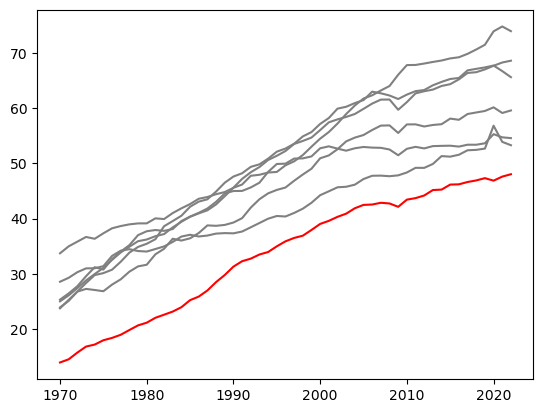

In [50]:
for country, df_country in df_g7.groupby("Country"):
    plt.plot(df_country["Year"], df_country["Productivity"], label=country, color="red" if country=="Japan" else "grey")
# plt.legend()

In [51]:
df_g7.to_csv("productivity_g7.csv", index=False)

In [54]:
df_g7_20th = df_g7[df_g7["Year"] >=2000]

In [56]:
df_g7_20th.to_csv("productivity_g7.csv")